# Titanic

Будем изучать датасет Titanic

In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import pandas as pd
import numpy as np
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('titanic_train.csv')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print('Size:', df.shape)

Size: (891, 12)


Посмотрим на статистику датасета

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Видим, что выживших было около 38%
Самому старому пассажиру было 80 лет, а самому молодому меньше года, в среднем пассажирам было около 30 лет. 

Посмотрим так же на распеделиние по полу.

In [5]:
df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Посмотрим средние значения числовых признаков для выживших пассажиров.

In [6]:
df[df['Survived'] == 1].mean()

PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.343690
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64

Тоже самое для погибших.

In [7]:
df[df['Survived'] == 0].mean()

PassengerId    447.016393
Survived         0.000000
Pclass           2.531876
Age             30.626179
SibSp            0.553734
Parch            0.329690
Fare            22.117887
dtype: float64

Таблица сопряженности

In [8]:
pd.crosstab(df['Survived'], df['Sex'], margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


Видно, что большинство женщин выжило.

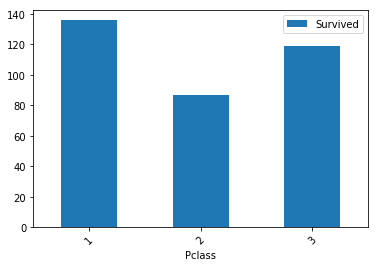

In [9]:
Classes_df = df[[x for x in df.columns if 'Pclass' in x] + ['Survived']]
Classes_df.groupby('Pclass').sum().plot(kind='bar', rot=45)

Меньше всего выжило людей из 2 класса

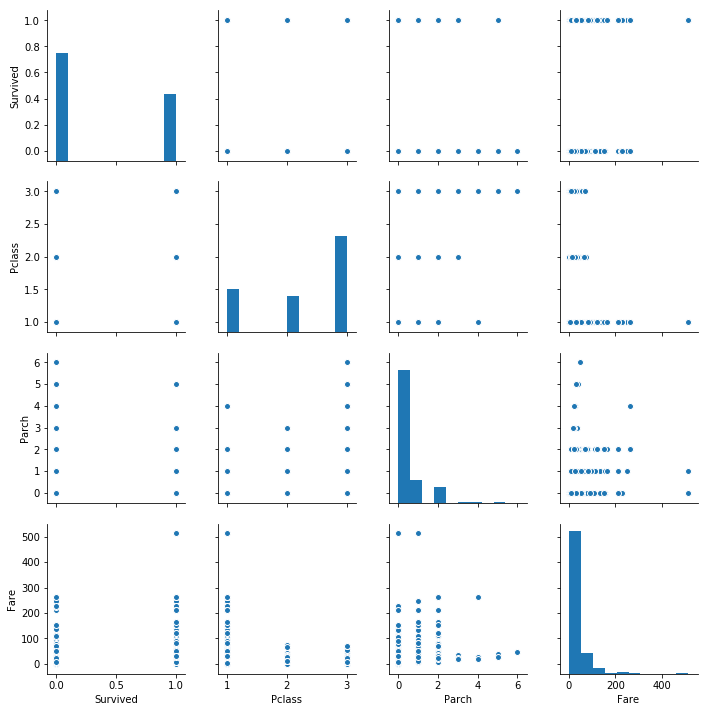

In [13]:
cols = ['Survived', 'Pclass', 'Parch', 'Fare']
sns_plot = sns.pairplot(df[cols])

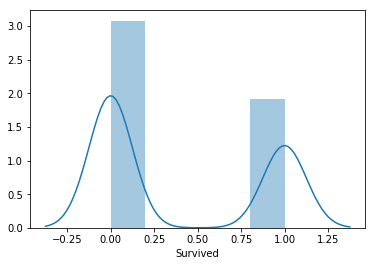

In [18]:
sns.distplot(df.Survived)

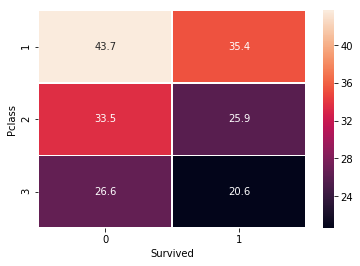

In [21]:
age = df.pivot_table(index='Pclass',
                     columns='Survived',
                     values='Age').applymap(float)
sns.heatmap(age, annot=True, fmt=".1f", linewidths=.5)